In [20]:
import pandas as pd

dan_analysis = pd.read_csv('./analysis/dan_analysis_report.csv',encoding="utf-8")
han_cnn_analysis = pd.read_csv('./analysis/han_cnn_analysis_report.csv',encoding="utf-8")

In [21]:
dan_analysis.id.values

array([  12,   31,  271,  349,  352,  363,  376,  455,  462,  490,  550,
        695,  701,  724,  734,  780,  832,  903,  916,  938, 1050, 1135,
       1172, 1176, 1184, 1196, 1198, 1219, 1222, 1248, 1250, 1268, 1328,
       1509, 1540, 1587, 1632, 1732, 1740, 1856, 1961, 1994, 2013, 2072,
       2158, 2172, 2216, 2221, 2234, 2254, 2305, 2319, 2341, 2349, 2373,
       2457, 2497, 2540, 2569, 2576, 2669, 2822, 2840, 2872, 2916, 3064,
       3103, 3281, 3312, 3329, 3431, 3595, 3642, 3666, 3721, 3730, 3928,
       3945, 3950, 4045, 4050, 4077, 4079, 4082, 4187, 4277, 4321, 4360,
       4361, 4381, 4398, 4428, 4450, 4516, 4850, 4901, 4915, 4924, 4940,
       5137, 5150, 5210, 5216])

In [22]:
han_cnn_analysis.id.values

array([  12,  271,  352,  439,  550,  724,  832,  875,  916, 1059, 1082,
       1088, 1176, 1196, 1198, 1508, 1523, 1587, 1598, 1710, 1732, 1740,
       1846, 1961, 2024, 2025, 2072, 2101, 2158, 2163, 2172, 2305, 2435,
       2669, 2822, 2916, 2984, 3281, 3312, 3368, 3388, 3642, 3666, 3730,
       3872, 3897, 3928, 3945, 3950, 4045, 4077, 4082, 4187, 4199, 4361,
       4398, 4410, 4428, 4760, 4915, 4924, 4935, 4947, 5002, 5210, 5216])

In [23]:
dan_analysis[dan_analysis["id"].isin(set(dan_analysis.id.values) - set(han_cnn_analysis.id.values))]

,Unnamed: 0,Unnamed: 0.1,target_text,source,DLA,id
1,31,31,At least 10 dead after train car explosions in...,At least 10 people were killed in explosions i...,Novel,31
3,349,349,Three persons have been detained in connection...,"Eight persons were on Tuesday injured, two of ...",Novel,349
5,363,363,Three persons have been detained in connection...,"Eight persons were on Tuesday injured, two of ...",Novel,363
6,376,376,At least eight persons were injured in an expl...,"Eight persons were on Tuesday injured, two of ...",Novel,376
7,455,455,"In the middle of a crowded bar, Adam Purinton ...",Law enforcement authorities in Johnson County...,Non-Novel,455
8,462,462,\nOlathe police and the FBI announced a press ...,Law enforcement authorities in Johnson County...,Non-Novel,462
9,490,490,"\nDevendra Gupta, 41, was born in a family of ...",NIA closure report says no evidence Sadhvi Pra...,Novel,490
11,695,695,A gunman opened fire Friday just before 1 p.m....,A lone gunman killed five people and injured e...,Non-Novel,695
12,701,701,Officials say law and order problems behind th...,Trade between India and Myanmar remained suspe...,Non-Novel,701
14,734,734,Four people were missing and a fifth was taken...,Authorities say at least one person is dead an...,Novel,734


In [26]:

import nltk
import matplotlib.pyplot as plt


def report_analysis(rep, ax):
    target_num_words = rep["target_text"].apply(lambda x: len(nltk.word_tokenize(x)))
    target_num_sent = rep["target_text"].apply(lambda x: len(nltk.sent_tokenize(x)))
    source_num_words = rep["source"].apply(lambda x: len(nltk.word_tokenize(x)))
    source_num_sent = rep["source"].apply(lambda x: len(nltk.sent_tokenize(x)))
    source_max_words_per_sent = rep['source'].apply(lambda x: max([len(nltk.word_tokenize(i)) for i  in nltk.sent_tokenize(x)]))
    target_max_words_per_sent = rep['target_text'].apply(lambda x: max([len(nltk.word_tokenize(i)) for i  in nltk.sent_tokenize(x)]))
    # source_named_entities = rep['source'].apply(lambda x: len(set([(X.text, X.label_) for X in nlp(x).ents])))
    # target_named_entities = rep['target_text'].apply(lambda x: len(set([(X.text, X.label_) for X in nlp(x).ents])))

    
    analysis = pd.DataFrame(
        {
            "target_num_words": target_num_words,
            "target_num_sent": target_num_sent,
            "source_num_words": source_num_words,
            "source_num_sent": source_num_sent,
            "source_max_words_per_sent":source_max_words_per_sent,
            "target_max_words_per_sent":target_max_words_per_sent,
            # "source_named_entities":source_named_entities,
            # "target_named_entities":target_named_entities,
        }
    )

    analysis.hist(ax = ax)
    return analysis.describe(percentiles=[])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


,source_max_words_per_sent,source_num_sent,source_num_words,target_max_words_per_sent,target_num_sent,target_num_words
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,70.587302,48.174603,1217.031746,52.571429,13.936508,358.714286
std,32.061249,21.661278,537.649993,21.677039,9.567878,236.626181
min,41.000000,16.000000,433.000000,28.000000,1.000000,28.000000
50%,61.000000,44.000000,1164.000000,48.000000,12.000000,312.000000
max,241.000000,152.000000,3269.000000,137.000000,43.000000,1097.000000


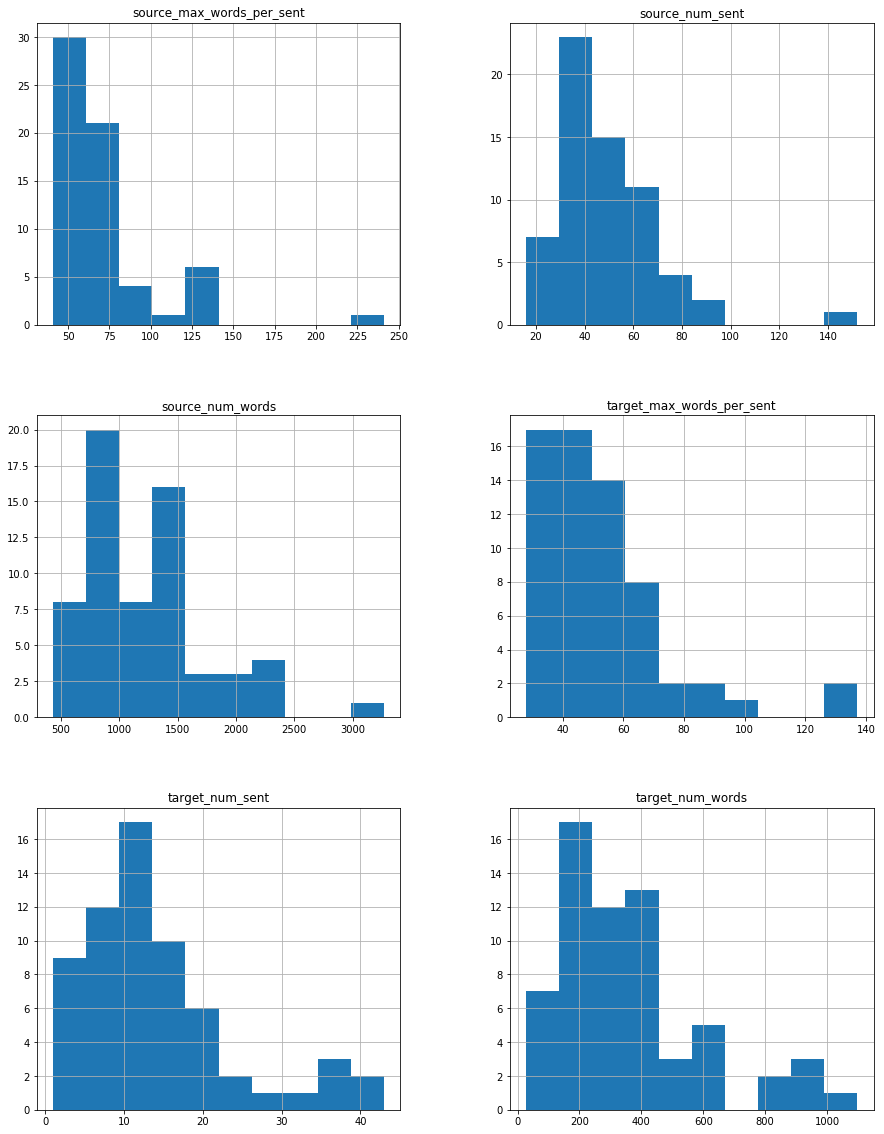

In [27]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
report_analysis(dan_analysis[dan_analysis["id"].isin(set(dan_analysis.id.values) - set(han_cnn_analysis.id.values))],ax)